In [3]:
# !pip install ipympl
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# !jupyter labextension install jupyter-matplotlib
# !pip install plotly "notebook>=5.3" "ipywidgets>=7.2"


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [50]:
# import plotly 
# plotly.tools.set_credentials_file(username='trucho', api_key='HhGM0cPISRqSpcvC028e')

## Testing PlotLy - Dash for RNAseq summary plot

In [70]:
import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

def log2(m):
    if m>0:
        return np.log2(m)
    else:
        return 0
    
def log2series(m):
    tempseries=m
    for i in range(0,len(tempseries)):
        tempseries[i]=log2(tempseries[i])
    return tempseries

def approx(n):
    return round(n*100)/100

In [ ]:
# fig = go.FigureWidget()
# # Display an empty figure
# fig

In [ ]:
# # Plot and embed in ipython notebook!
# fig.add_scatter(x = random_x,
#                 y = random_y,
#                 mode = 'markers')
# # Add a title
# fig.layout.title = 'Hello FigureWidget'

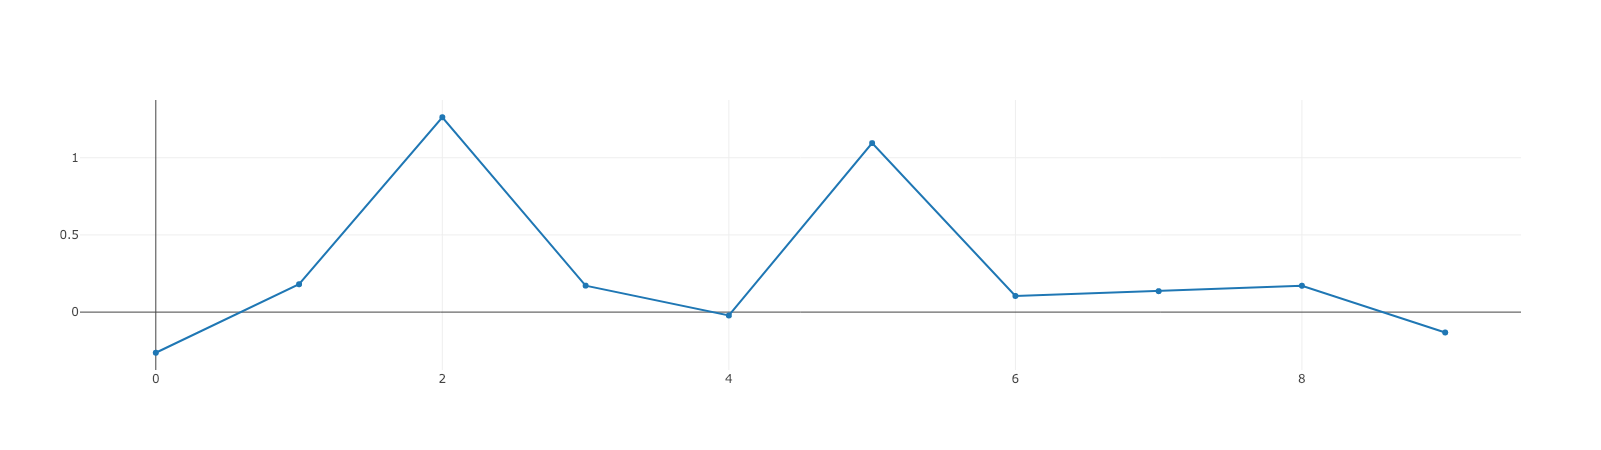

In [57]:
N = 10
random_x = np.array(range(N))
random_y = np.random.randn(N)
data = go.Scatter(x = random_x,y = random_y)

pyo.iplot([data], filename='jupyter-basic_bar')


In [95]:
kv = pd.read_csv("/Users/angueyraaristjm/Documents/Python/RNAseq/SqConesKvs.csv")
significant=(kv['padj'] <= 0.05)
kvplus = kv[significant]
kvminus = kv[~significant]

kvplus['log2FoldChange']

0    2.507509
Name: log2FoldChange, dtype: float64

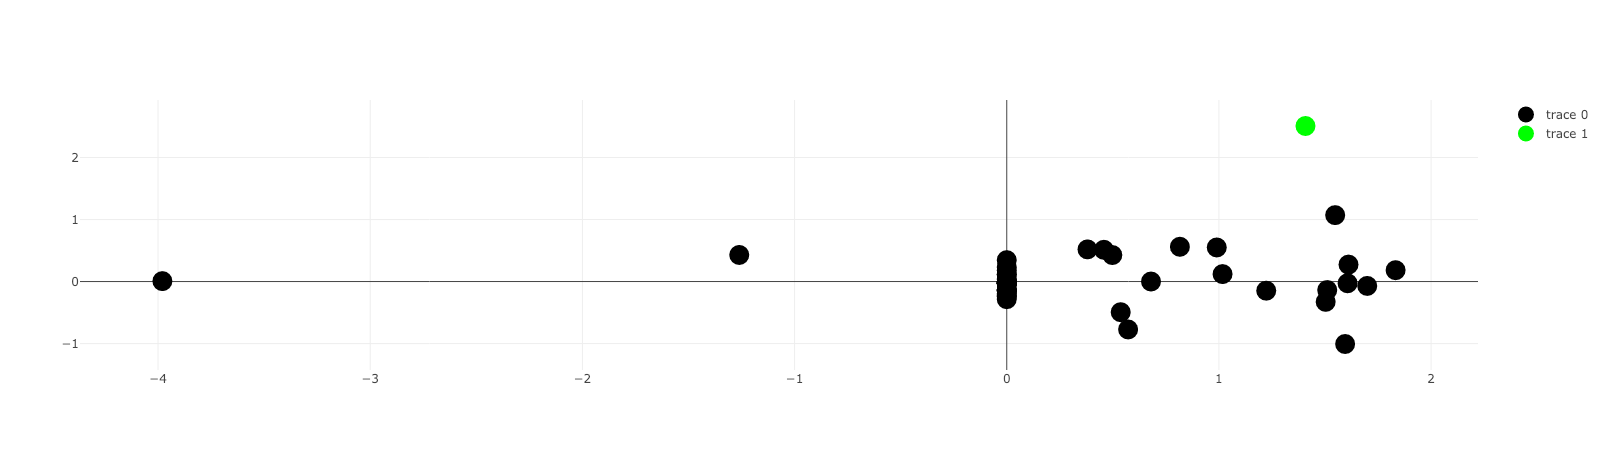

In [98]:
data1 = go.Scatter(
    x = log2series(kvminus['baseMean'].values),
    y = kvminus['log2FoldChange'].values,
    mode = 'markers',
    marker={"color": "rgb(0,0,0)", "size": 20},
    text=kvminus['SYMBOL'].values
)

data2 = go.Scatter(
    x = log2series(kvplus['baseMean'].values),
    y = kvplus['log2FoldChange'].values,
    mode = 'markers',
    marker={"color": "rgb(0,255,0)", "size": 20},
    text=kvplus['SYMBOL'].values
)
pyo.iplot([data1, data2], filename='kv')

## Testing mpld3 plotting of RNAseq summary plot
### From http://mpld3.github.io/faq.html &rarr; mpld3 is not intended for large datasets with > 1000 objects because d3 uses svg which slow down with too many objects.
They recommend bokeh or VisPy (under development)
I had found that plotly - Dash could be a good alternative

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3
import pandas as pd
from mpld3 import plugins

In [ ]:
%matplotlib widget
plt.figure()
x = [1,2,3]
y = [4,5,6]
plt.plot(x,y)
plt.show();

In [ ]:
%matplotlib inline
# fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
mpld3.enable_notebook()

In [ ]:

np.random.seed(9615)

# generate df
N = 100
df = pd.DataFrame((.1 * (np.random.random((N, 5)) - .5)).cumsum(0),
                  columns=['a', 'b', 'c', 'd', 'e'],)

# plot line + confidence interval
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

for key, val in df.iteritems():
    l, = ax.plot(val.index, val.values, label=key)
    ax.fill_between(val.index,
                    val.values * .5, val.values * 1.5,
                    color=l.get_color(), alpha=.4)

# define interactive legend

handles, labels = ax.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(zip(handles,
                                                         ax.collections),
                                                     labels,
                                                     alpha_unsel=0.5,
                                                     alpha_over=1.5, 
                                                     start_visible=True)
plugins.connect(fig, interactive_legend)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Interactive legend', size=20)

mpld3.display()